In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statistics
import glob
import time

import analysis_pkg
%load_ext autoreload
%autoreload 2

In [39]:
start_time = time.time()
sex_sep, sex_full, cat_full = analysis_pkg.multiyear_multibase_analysis(2014, 2018)
print(" %s min" % round(((time.time() - start_time)/60), 2))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.5s
[Parallel(n_jobs=4)]: Done 135 out of 135 | elapsed:   33.2s finished
-0.38396723536213007
0.37726511956064257
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   14.3s
[Parallel(n_jobs=4)]: Done 135 out of 135 | elapsed:   43.7s finished
-0.39111625193824945
0.37758615289610165
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   14.4s
[Parallel(n_jobs=4)]: Done 135 out of 135 | elapsed:   44.0s finished
-0.3844280011089728
0.3756927300525211
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[Parallel(n_j

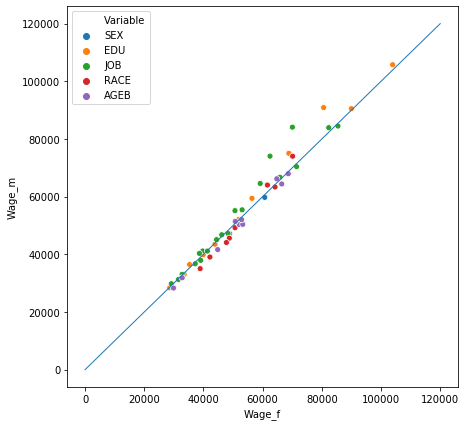

In [15]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="Wage_f", y="Wage_m", hue="Variable",data=sex_sep)
plt.plot([0,120000], [0,120000], linewidth=1)

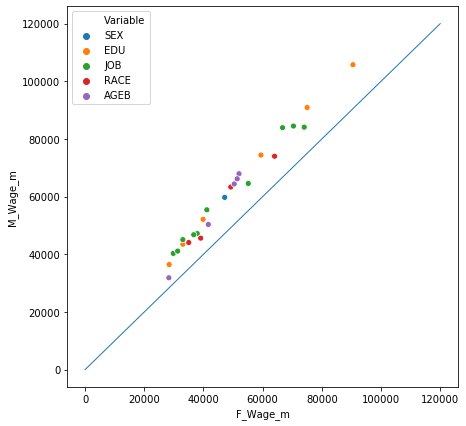

In [16]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="F_Wage_m", y="M_Wage_m", hue="Variable",data=sex_full)
plt.plot([0,120000], [0,120000], linewidth=1)

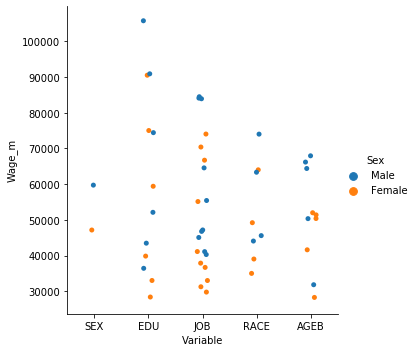

In [18]:
g = sns.catplot(x="Variable", y="Wage_m", hue="Sex",
                data=sex_sep)

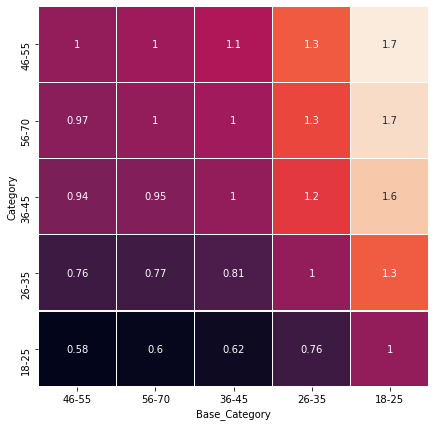

In [19]:
analysis_pkg.plot_heatmap_basecat(cat_full, 'AGEB')

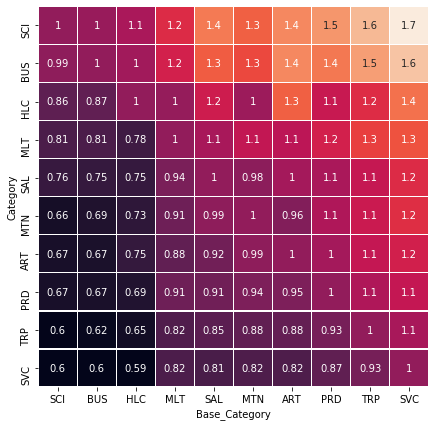

In [20]:
analysis_pkg.plot_heatmap_basecat(cat_full, 'JOB')

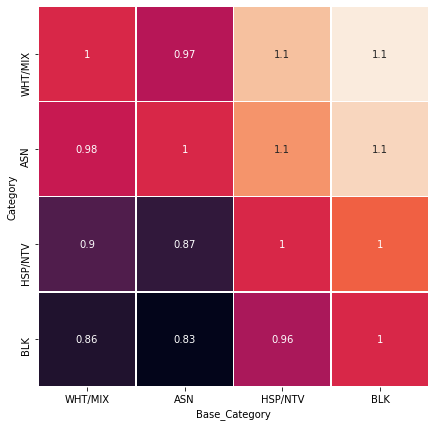

In [21]:
analysis_pkg.plot_heatmap_basecat(cat_full, 'RACE')

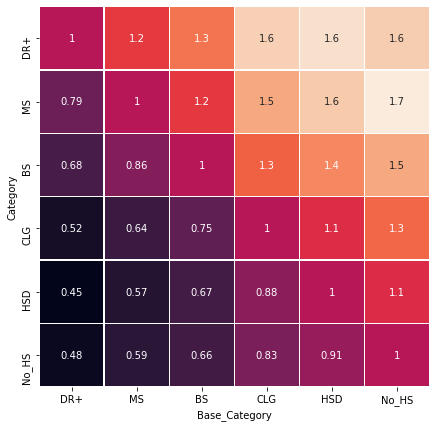

In [22]:
analysis_pkg.plot_heatmap_basecat(cat_full, 'EDU')

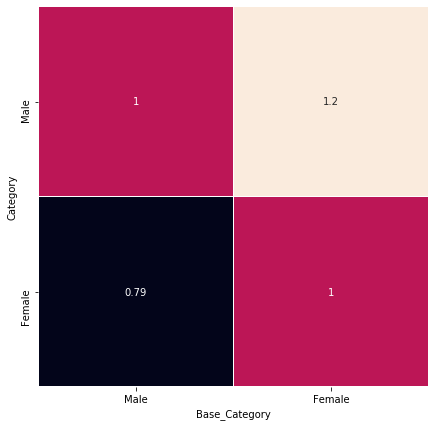

In [23]:
analysis_pkg.plot_heatmap_basecat(cat_full, 'SEX')

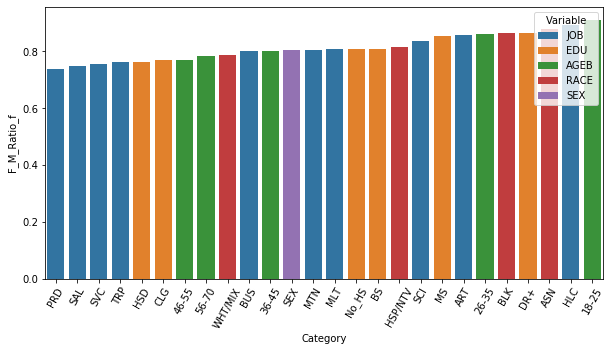

In [24]:
sex_full_sort = sex_full.sort_values(by=['F_M_Ratio_f'])
sex_full_list = sex_full_sort['Category'].tolist()
plt.figure(figsize=(10,5))
plt.xticks(rotation=60)
g = sns.barplot(y="F_M_Ratio_f", x="Category", dodge = False,
                hue='Variable', data=sex_full_sort)

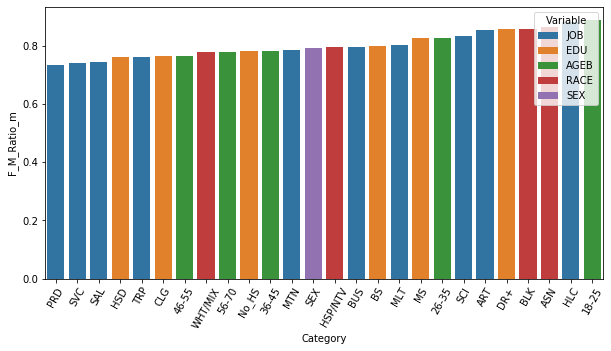

In [25]:
sex_full_sort = sex_full.sort_values(by=['F_M_Ratio_m'])
sex_full_list = sex_full_sort['Category'].tolist()
plt.figure(figsize=(10,5))
plt.xticks(rotation=60)
g = sns.barplot(y="F_M_Ratio_m", x="Category", dodge = False,
                hue='Variable', data=sex_full_sort)